<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n'] > 100]
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop([ 'median', 'min', 'range',  'indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','m'], axis = 1)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

     n   n/m   av.length     std.dev   max    k
0  200   2.5  797.034973  202.547165  1332  172
1  220  11.0   98.109093   46.257042   235  133
2   20   2.5   43.900002   13.572030    64   14
3  198  11.0  489.580811  178.688019   792  162
4  100  10.0   52.980000   27.386120   100   62


In [3]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
tmp = tmp.sample(frac = 1).reset_index()
y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)

1655304


In [4]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({528: 1416, 1159: 1416, 180: 1416, 144: 1416, 383: 1416, 166: 1416, 2305: 1416, 2353: 1416, 453: 1416, 1051: 1416, 1595: 1416, 2271: 1416, 72: 1416, 3472: 1416, 3728: 1416, 1516: 1416, 2458: 1416, 506: 1416, 2361: 1416, 606: 1416, 445: 1416, 1361: 1416, 437: 1416, 1732: 1416, 2028: 1416, 141: 1416, 1277: 1416, 1227: 1416, 267: 1416, 4: 1416, 1002: 1416, 38: 1416, 3704: 1416, 294: 1416, 1502: 1416, 232: 1416, 719: 1416, 11: 1416, 849: 1416, 325: 1416, 1093: 1416, 414: 1416, 1169: 1416, 78: 1416, 1077: 1416, 486: 1416, 1690: 1416, 284: 1416, 1040: 1416, 2599: 1416, 505: 1416, 1450: 1416, 59: 1416, 621: 1416, 832: 1416, 513: 1416, 161: 1416, 184: 1416, 210: 1416, 239: 1416, 156: 1416, 209: 1416, 70: 1416, 747: 1416, 3855: 1416, 110: 1416, 901: 1416, 483: 1416, 127: 1416, 1342: 1416, 250: 1416, 401: 1416, 3557: 1416, 1751: 1416, 1117: 1416, 290: 1416, 278: 1416, 1606: 1416, 2797: 1416, 2349: 1416, 837: 1416, 602: 1416, 49: 1416, 1760: 1416, 534: 1416, 2771: 1416, 208: 1416, 847: 14

In [5]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow
from tensorflow import keras 


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,1))
    return 99999*1/(1+K.exp(-x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.1))

    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(16, activation = 'relu'))

    #model.add(Dense(32, activation='relu'))

    #model.add(Dense(64, activation='relu'))

    model.add(Dense(8, activation='relu'))
    
    model.add(Dense(1, activation = custom_activation))
    #model.add(Activation(custom_activation, name='SpecialActivation'))
    #model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(clipnorm=1))
    #model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.compile(loss='mean_squared_error', optimizer='Adam')
    return model

In [6]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)


X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=15, batch_size=128, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train)
#plt.plot(history.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/15
10734/10734 [==============================] - 37s 3ms/step - loss: 16413472.0000
Epoch 2/15
10734/10734 [==============================] - 26s 2ms/step - loss: 2012075.6250
Epoch 3/15
10734/10734 [==============================] - 27s 3ms/step - loss: 1750793.5000
Epoch 4/15
10734/10734 [==============================] - 25s 2ms/step - loss: 1680299.2500
Epoch 5/15
10734/10734 [==============================] - 27s 3ms/step - loss: 1563790.1250
Epoch 6/15
10734/10734 [==============================] - 26s 2ms/step - loss: 1528987.0000
Epoch 7/15
10734/10734 [==============================] - 24s 2ms/step - loss: 1485252.0000
Epoch 8/15
10734/10734 [==============================] - 26s 2ms/step - loss: 1433637.6250
Epoch 9/15
10734/10734 [==============================] - 27s 3ms/step - loss: 1452497.0000
Epoch 10/15
10734/10734 [==============================] - 24s 2ms/step - loss: 1393032.0000
Epoch 11/15
10734/10734 [==============================] - 24s 2ms/step - loss

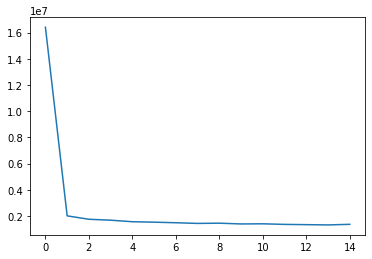

In [7]:
plt.plot(history.history['loss'])

In [8]:
#from sklearn.metrics import r2_score
#prediction = estimator.predict(X_val)
#print("r_square score: ", r2_score(y_val,prediction))
##y_test = sc2.inverse_transform(y_test.reshape(-1,1))
#yy = np.array(y_val)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
#predd = np.array(prediction)
#for i in range(len(yy)):
#  if(yy[i]-predd[i] > 99000):
#    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))

In [9]:
#from sklearn.metrics import mean_squared_error
#from math import sqrt

#print("RMSE:")
#sqrt(mean_squared_error(yy, predd)) 

In [10]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)


av_bad = []
n_bad = []
std_dev_bad = []
max_bad = []
nm_bad = []
k_bad = []
#min_bad = []

av_good = []
n_good = []
std_dev_good = []
nm_good = []
max_good = []
k_good = []
#min_good = []

for i in range(len(yy)):
  if(yy[i]-predd[i] > 99000):
    av_bad.append(X_test_copy.iloc[i]['av.length'])
    n_bad.append(X_test_copy.iloc[i]['n'])
    std_dev_bad.append(X_test_copy.iloc[i]['std.dev'])
    nm_bad.append(X_test_copy.iloc[i]['n/m'])
    max_bad.append(X_test_copy.iloc[i]['max'])
    k_bad.append(X_test_copy.iloc[i]['k'])
    #min_bad.append(X_test_copy.iloc[i]['min'])

    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))
  if(abs(yy[i]-predd[i])<100 and yy[i]>99500):
    av_good.append(X_test_copy.iloc[i]['av.length'])
    n_good.append(X_test_copy.iloc[i]['n'])
    std_dev_good.append(X_test_copy.iloc[i]['std.dev'])
    nm_good.append(X_test_copy.iloc[i]['n/m'])
    max_good.append(X_test_copy.iloc[i]['max'])
    k_good.append(X_test_copy.iloc[i]['k'])
    #min_good.append(X_test_copy.iloc[i]['min'])



2199/2199 [==============================] - 3s 1ms/step
r_square score:  0.8052724670337573
real value of y_test: 99999 -> the predict: 115.60705
real value of y_test: 99999 -> the predict: 101.46797
real value of y_test: 99999 -> the predict: 109.788414
real value of y_test: 99999 -> the predict: 851.26227
real value of y_test: 99999 -> the predict: 52.6055


In [11]:
print(np.max(predd))

99997.91


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


1273.7599868358602

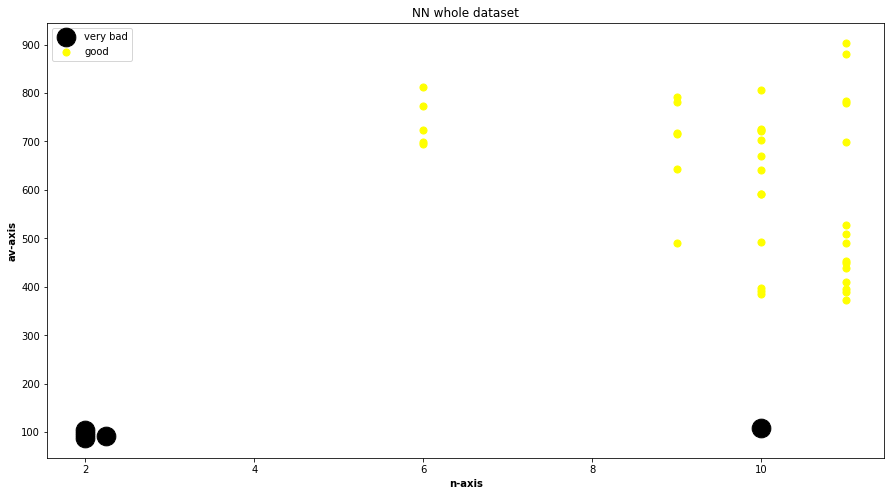

In [13]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(nm_bad, av_bad, s = 350, color = 'black')
ax.scatter(nm_good, av_good, s= 50, color = 'yellow')

ax.set_xlabel('n-axis', fontweight ='bold')
ax.set_ylabel('av-axis', fontweight ='bold')
plt.title("NN whole dataset")
 
ax.legend(['very bad', 'good'])
# show plot
plt.show()

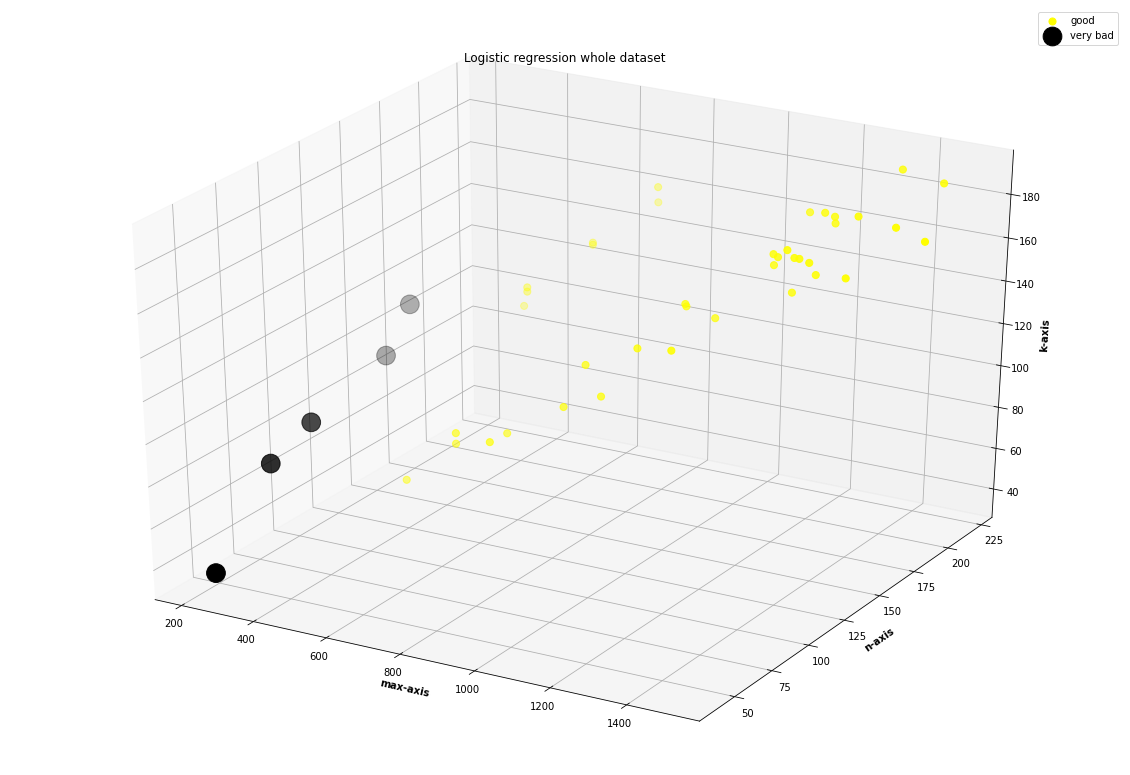

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.scatter3D(max_good, n_good, k_good, s = 50, color = 'yellow')
ax.scatter3D(max_bad, n_bad, k_bad, s = 350, color = 'black')


plt.title("Logistic regression whole dataset")
ax.set_xlabel('max-axis', fontweight ='bold')
ax.set_ylabel('n-axis', fontweight ='bold')
ax.set_zlabel('k-axis', fontweight ='bold')
ax.legend(['good', 'very bad'])
 
# show plot
plt.show()